In [12]:
import h5py
import numpy as np
import torch
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.models import resnet18


In [2]:
# Chemin vers tes données
file_path = "Data_ML/SC_FC_dataset_filtered_68x68.h5"

# Charger les données depuis le fichier h5 (uniquement FC_correlation)
with h5py.File(file_path, "r") as f:
    # Chargement FC_correlation pour les patients sains (CTRL)
    ctrl_FC = f["FC_correlation"]["ctrl"][:]  # (27, 68, 68)
    
    # Chargement FC_correlation pour les patients schizophrènes (SCHZ)
    schz_FC = f["FC_correlation"]["schz"][:]  # (27, 68, 68)

# Vérification des dimensions
print("CTRL FC shape:", ctrl_FC.shape)   # attendu (27,68,68)
print("SCHZ FC shape:", schz_FC.shape)   # attendu (27,68,68)

# Concaténation des données
X_FC = np.concatenate([ctrl_FC, schz_FC], axis=0)  # (54, 68, 68)

# Création des labels correspondants
y_labels = np.array([0]*len(ctrl_FC) + [1]*len(schz_FC))  # 0: CTRL, 1: SCHZ

# Flatten chaque matrice FC en vecteur
X_FC_flat = X_FC.reshape(X_FC.shape[0], -1)  # shape finale (54, 4624)

# Vérification finale
print("Data finale (patients, features):", X_FC_flat.shape)
print("Labels shape:", y_labels.shape)


CTRL FC shape: (27, 68, 68)
SCHZ FC shape: (27, 68, 68)
Data finale (patients, features): (54, 4624)
Labels shape: (54,)


C:\Users\Guillaume\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


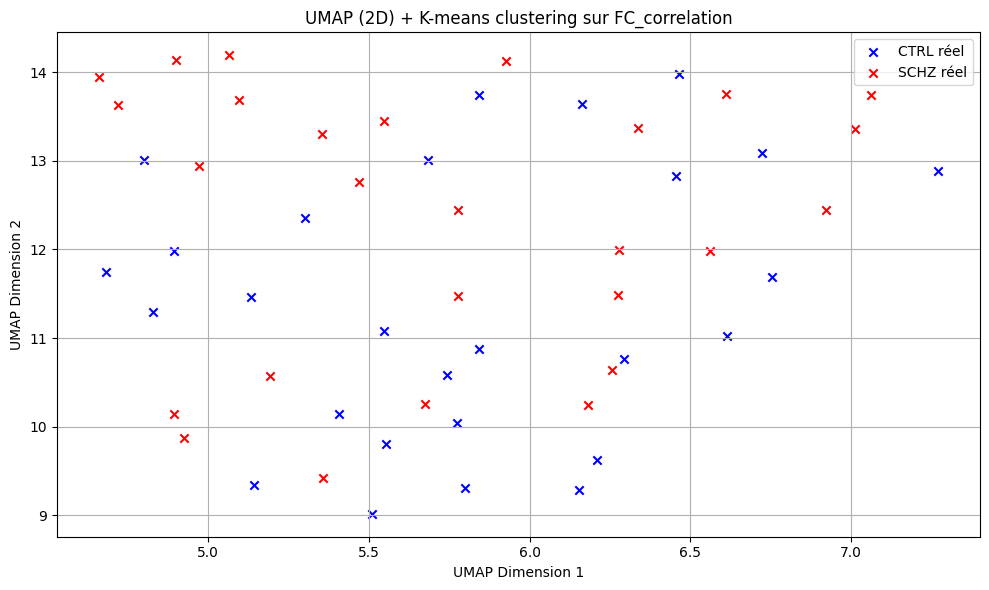

In [11]:

# ---- Étape 1 : Réduction dimensionnelle UMAP (2D) ----
reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_FC_flat)

# ---- Étape 2 : Visualisation claire (UMAP) ----
plt.figure(figsize=(10, 6))


# Affichage des vraies catégories (CTRL vs SCHZ) par-dessus
plt.scatter(X_umap[y_labels==0, 0], X_umap[y_labels==0, 1],
            label='CTRL réel', marker='x', c='blue')

plt.scatter(X_umap[y_labels==1, 0], X_umap[y_labels==1, 1],
            label='SCHZ réel', marker='x', c='red')

# Détails du graphique
plt.title("UMAP (2D) + K-means clustering sur FC_correlation")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
